In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(r'D:\numerical op\labs\RegData.csv',header=None,names=['x1','y'])
data

,x1,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


<AxesSubplot:xlabel='x1', ylabel='y'>

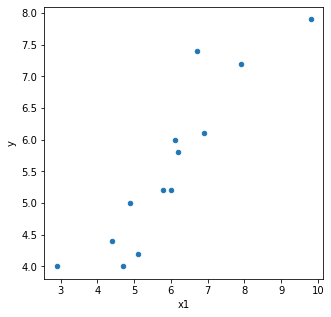

In [6]:
data.plot(kind='scatter', x='x1', y='y', figsize=(5,5))

In [7]:
data.insert(0, 'x0', 1)
print('new data = \n' ,data.head(10) )

new data = 
    x0   x1    y
0   1  2.9  4.0
1   1  6.7  7.4
2   1  4.9  5.0
3   1  7.9  7.2
4   1  9.8  7.9
5   1  6.9  6.1
6   1  6.1  6.0
7   1  6.2  5.8
8   1  6.0  5.2
9   1  5.1  4.2


#### Explore your data

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [8]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#### Explore your data

In [9]:
print(x)
print(y)

    x0   x1
0    1  2.9
1    1  6.7
2    1  4.9
3    1  7.9
4    1  9.8
5    1  6.9
6    1  6.1
7    1  6.2
8    1  6.0
9    1  5.1
10   1  4.7
11   1  4.4
12   1  5.8
      y
0   4.0
1   7.4
2   5.0
3   7.2
4   7.9
5   6.1
6   6.0
7   5.8
8   5.2
9   4.2
10  4.0
11  4.4
12  5.2


In [10]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
print(x.shape)
print(y.shape)
print(theta.shape)

(13, 2)
(13, 1)
(1, 2)


## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

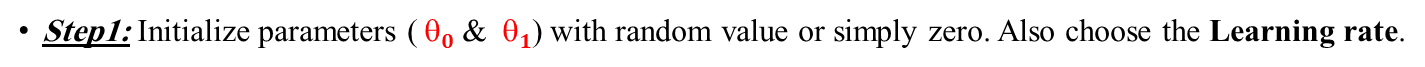

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.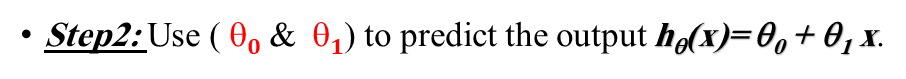
#### Note: you will need to iterate through all data points

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).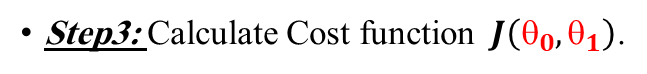
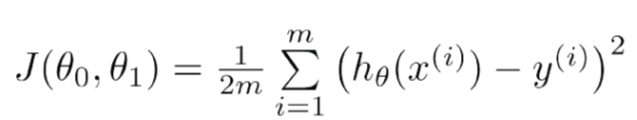

### Step4: Calculate the gradient.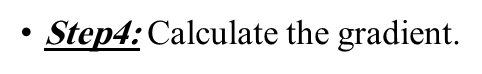
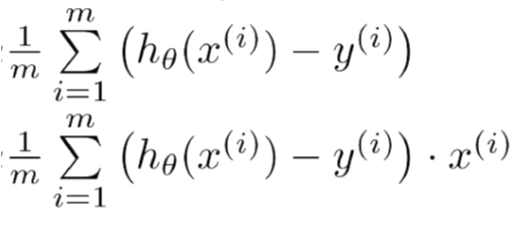

### Step5: Update the parameters (simultaneously).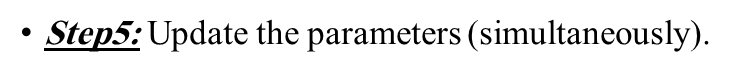
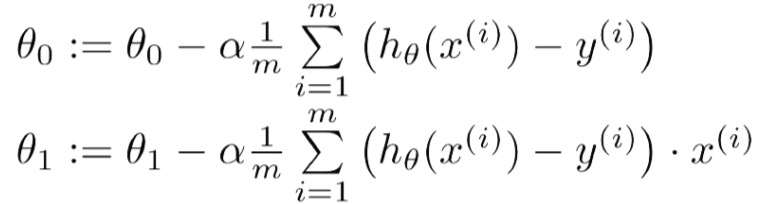

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.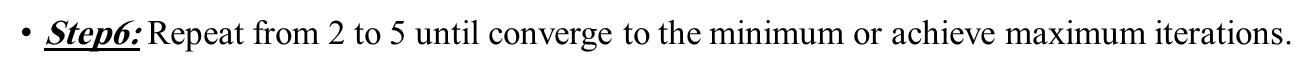

In [12]:
def computeCost(x, y, theta):
    z = np.power(((x * theta.T) - y), 2)
    return np.sum(z) / (2 * len(x))

print('computeCost(x, y, theta) = ' , computeCost(x, y, theta))

computeCost(x, y, theta) =  16.305384479692318


In [14]:
def gradientDescent(x, y, theta, alpha, iters):  
    
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(x, y, theta)
        
    return theta, cost

In [15]:
alpha=.001
iters=100
theta,cost=gradientDescent(x,y,theta,alpha,iters)

In [17]:
print(theta)
print("*"*50)
print(cost)

[[0.14651653 0.87874169]]
**************************************************
[15.07090799 13.93106455 12.87859969 11.90681505 11.00952577 10.18102111
  9.41602813  8.70967808  8.05747545  7.45526936  6.89922713  6.38580988
  5.91175003  5.47403048  5.06986543  4.69668261  4.35210697  4.0339455
  3.74017333  3.46892079  3.21846156  2.98720164  2.77366923  2.57650537
  2.39445525  2.22636027  2.07115064  1.92783859  1.79551207  1.67332892
  1.56051158  1.45634207  1.36015745  1.27134562  1.18934138  1.11362286
  1.04370822  0.97915254  0.91954499  0.86450627  0.81368613  0.76676118
  0.72343281  0.68342533  0.64648415  0.61237421  0.58087847  0.55179654
  0.52494336  0.5001481   0.47725298  0.45611236  0.43659172  0.41856689
  0.40192319  0.38655475  0.37236381  0.35926011  0.3471603   0.33598741
  0.32567041  0.31614366  0.3073466   0.29922328  0.29172206  0.28479525
  0.27839881  0.2724921   0.26703755  0.26200052  0.257349    0.25305343
  0.24908653  0.2454231   0.24203987  0.23891538

In [18]:
print('computeCost(X, y, theta) = ' , computeCost(x, y, theta))

computeCost(X, y, theta) =  0.20671915357934667


Text(0.5, 1.0, 'Error vs. Training Epoch')

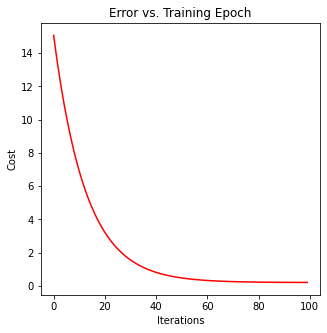

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Text(0.5, 1.0, 'x1 v.s y')

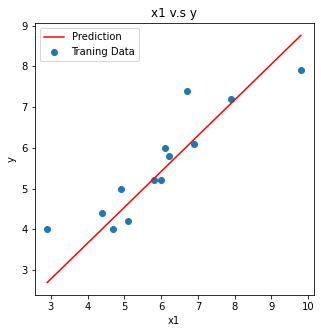

In [25]:
x = np.linspace(data.x1.min(), data.x1.max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.x1, data.y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('x1')
ax.set_ylabel('y')
ax.set_title('x1 v.s y')

#### Use R2 score to evaluate LR equation output
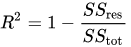
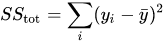
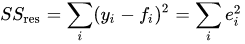
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [26]:
from sklearn.metrics import r2_score

In [29]:
predicted_y = theta[0, 0] + (theta[0, 1] * data.x1.values)
print("R2 score for the  data is ", r2_score(y,predicted_y))

R2 score for the  data is  0.7406996532992384


## Multivariate LR

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data3=pd.read_csv(r'D:\numerical op\intake 1\labs\MultipleLR.csv',header=None,names=['x1','x2','x3','y'])
data3.head(10)

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [3]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      25 non-null     int64
 1   x2      25 non-null     int64
 2   x3      25 non-null     int64
 3   y       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [4]:
data3.describe()

,x1,x2,x3,y
count,25.000000,25.000000,25.000000,25.000000
mean,79.040000,79.480000,81.480000,162.040000
std,12.279658,12.503733,11.765486,24.044195
min,47.000000,46.000000,55.000000,101.000000
25%,73.000000,73.000000,73.000000,148.000000
50%,79.000000,82.000000,85.000000,164.000000
75%,88.000000,89.000000,90.000000,180.000000
max,96.000000,98.000000,100.000000,196.000000


In [5]:
#data3=(data3-data3.mean())/data3.std()

In [6]:
#data3.head(10)

In [7]:
data3.insert(0,'ones',1)
data3.head(10)

,ones,x1,x2,x3,y
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142
5,1,53,46,55,101
6,1,69,74,77,149
7,1,47,56,60,115
8,1,87,79,90,175
9,1,79,70,88,164


In [8]:
cols=data3.shape[1]
X=data3.iloc[:,0:cols-1]
Y=data3.iloc[:,cols-1:cols]

In [9]:
X.head(10)

,ones,x1,x2,x3
0,1,73,80,75
1,1,93,88,93
2,1,89,91,90
3,1,96,98,100
4,1,73,66,70
5,1,53,46,55
6,1,69,74,77
7,1,47,56,60
8,1,87,79,90
9,1,79,70,88


In [10]:
Y.head(10)

,y
0,152
1,185
2,180
3,196
4,142
5,101
6,149
7,115
8,175
9,164


In [11]:
x=np.matrix(X.values)
y=np.matrix(Y.values)

In [12]:
print(x)
print(y)

[[  1  73  80  75]
 [  1  93  88  93]
 [  1  89  91  90]
 [  1  96  98 100]
 [  1  73  66  70]
 [  1  53  46  55]
 [  1  69  74  77]
 [  1  47  56  60]
 [  1  87  79  90]
 [  1  79  70  88]
 [  1  69  70  73]
 [  1  70  65  74]
 [  1  93  95  91]
 [  1  79  80  73]
 [  1  70  73  78]
 [  1  93  89  96]
 [  1  78  75  68]
 [  1  81  90  93]
 [  1  88  92  86]
 [  1  78  83  77]
 [  1  82  86  90]
 [  1  86  82  89]
 [  1  78  83  85]
 [  1  76  83  71]
 [  1  96  93  95]]
[[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]
 [149]
 [192]]


In [13]:
theta=np.matrix(np.array([0,0,0,0]))
print(theta.shape)

(1, 4)


In [14]:
alpha=0.0001
iters=1000

In [15]:
def computeCost(x, y, theta):
    z = np.power(((x * theta.T) - y), 2)
    return np.sum(z) / (2 * len(x))

print('computeCost(x, y, theta) = ' , computeCost(x, y, theta))

computeCost(x, y, theta) =  13405.98


In [16]:
def gradientDescent(x, y, theta, alpha, iters):  
    
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(x, y, theta)
        
    return theta, cost

In [17]:
theta_values,cost=gradientDescent(x,y,theta,alpha,iters)

In [18]:
print(theta_values)

[[0.00289951 0.44203697 0.51777825 1.05569807]]


In [19]:
print(cost)

[1.23486676e+04 1.13747790e+04 1.04777319e+04 9.65146312e+03
 8.89038823e+03 8.18936324e+03 7.54365006e+03 6.94888445e+03
 6.40104653e+03 5.89643360e+03 5.43163509e+03 5.00350955e+03
 4.60916339e+03 4.24593135e+03 3.91135844e+03 3.60318339e+03
 3.31932334e+03 3.05785979e+03 2.81702559e+03 2.59519305e+03
 2.39086289e+03 2.20265413e+03 2.02929475e+03 1.86961311e+03
 1.72253000e+03 1.58705137e+03 1.46226159e+03 1.34731730e+03
 1.24144166e+03 1.14391914e+03 1.05409066e+03 9.71349142e+02
 8.95135410e+02 8.24934410e+02 7.60271723e+02 7.00710368e+02
 6.45847838e+02 5.95313387e+02 5.48765523e+02 5.05889697e+02
 4.66396178e+02 4.30018097e+02 3.96509641e+02 3.65644392e+02
 3.37213797e+02 3.11025759e+02 2.86903337e+02 2.64683552e+02
 2.44216284e+02 2.25363257e+02 2.07997108e+02 1.92000519e+02
 1.77265432e+02 1.63692314e+02 1.51189486e+02 1.39672502e+02
 1.29063578e+02 1.19291070e+02 1.10288984e+02 1.01996535e+02
 9.43577340e+01 8.73210086e+01 8.08388562e+01 7.48675222e+01
 6.93667045e+01 6.429928

In [20]:
print('computeCost(x, y, theta) = ' , computeCost(x, y, theta_values))

computeCost(x, y, theta) =  3.1398865791097923


Text(0.5, 1.0, 'Error vs. Training Epoch')

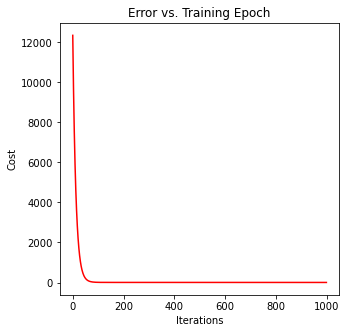

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Text(0.5, 1.0, 'Size vs. Price')

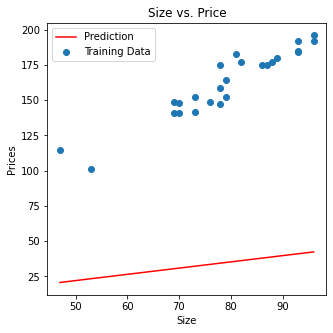

In [24]:
x = np.linspace(data3.x1.min(), data3.x1.max(), 100)
f = theta_values[0, 0] + (theta_values[0, 1] * x)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data3.x1, data3.y, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Prices')
ax.set_title('Size vs. Price')

Text(0.5, 1.0, 'Size vs. Price')

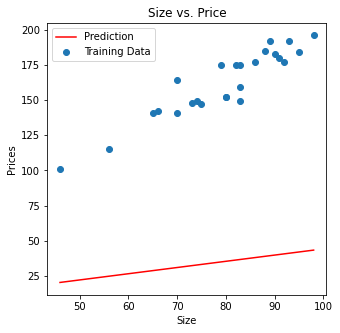

In [28]:
x = np.linspace(data3.x2.min(), data3.x2.max(), 1000)
f = theta_values[0, 0] + (theta_values[0, 1] * x)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data3.x2, data3.y, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Prices')
ax.set_title('Size vs. Price')